In [1]:
import pypdfium2 as pdfium
from docarray import Document, DocumentArray
import os
import openai
from dotenv import load_dotenv
load_dotenv()
openai.api_key = os.getenv('OPENAI_API_KEY')

In [2]:
pdf = pdfium.PdfDocument("./02465_Notes.pdf")

text_all = ""
for page in pdf:
    textpage = page.get_textpage()
    text_all += " ".join(textpage.get_text_range().splitlines())

In [3]:
text_segments = list(filter(None, text_all.split('. ')))
text_segments = [seg for seg in text_segments if len(seg)>10]

In [25]:
#docs = DocumentArray(Document(text = s, embedding=[0,0,0]) for s in text_segments)
#docs.apply(lambda doc: test(doc))



len_seg = len(text_segments)

def get_color(idx):
    color_idx = int((idx/len_seg)*(255*5))
    color_round = color_idx//256

    r = 0
    g = 0
    b = 0
    if color_round == 0:
        r = 255
        g = idx % 255
        b = 0
    elif color_round == 1:
        r = 255 - (idx % 255)
        g = 255
        b = 0
    elif color_round == 2:
        r = 0
        g = 255
        b = idx % 255
    elif color_round == 3:
        r = 0
        g = 255 - (idx % 255)
        b = 255
    elif color_round == 4:
        r = idx % 255
        g = 0
        b = 255
        
    
    #return f'#{r:02x}{g:02x}{b:02x}'
    return (r,g,b)



docs = DocumentArray(Document(text = s, idx=i, color = get_color(i)) for i,s in enumerate(text_segments))
docs.apply(lambda doc: doc.embed_feature_hashing())

╭────────────────────── Documents Summary ───────────────────────╮
│                                                                │
│   Type                   DocumentArrayInMemory                 │
│   Length                 2834                                  │
│   Homogenous Documents   True                                  │
│   Common Attributes      ('id', 'text', 'tags', 'embedding')   │
│   Multimodal dataclass   False                                 │
│                                                                │
╰────────────────────────────────────────────────────────────────╯
╭────────────────────── Attributes Summary ───────────────────────╮
│                                                                 │
│   Attribute   Data type      #Unique values   Has empty value   │
│  ─────────────────────────────────────────────────────────────  │
│   embedding   ('ndarray',)   2834             False             │
│   id          ('str',)       2834             False             │
│   tags        ('dict',)      2834             False             │
│   text        ('str',)       2820             False             │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯

In [43]:
cols = []
for d in docs:
    cols.append(d.tags['color'])

In [26]:
#question = 'Is Euler-discretization exact when both the dynamics and cost-function for the continuous-time control problem are linear?'
question = 'Wat is a cat?'
query_ns = (Document(text=question).embed_feature_hashing().match(docs, limit=50, exclude_self=True, metric="jaccard", use_scipy=True))

In [27]:
colors = [t['color'] for t in query_ns.matches[:,'tags']]

In [19]:
import seaborn as sns

In [21]:
sns.set()

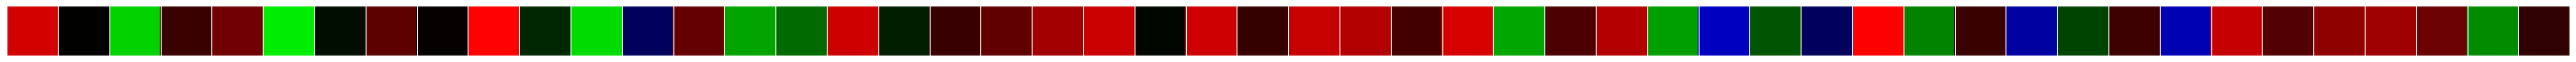

In [28]:
sns.palplot(colors)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba_array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


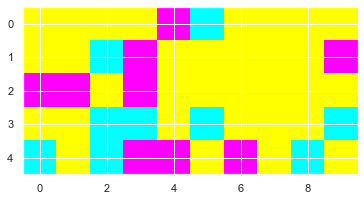

In [29]:
plt.imshow(to_rgba_array(colors).reshape(5,10,4))
plt.show()